In [2]:
# core
import sys
import time

# custom
sys.path.append('../code/poloniex')
import polo_eda as pe

# installed
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pe.read_trade_hist('BTC_AMP')

In [4]:
df.head()

,amount,globalTradeID,rate,total,tradeID,type
date,,,,,,
2016-04-03 05:53:09,73.990725,24874739,0.000400,0.029596,1,sell
2016-04-03 05:53:09,298.963484,24874743,0.000110,0.032886,5,sell
2016-04-03 05:53:09,2161.343800,24874740,0.000150,0.324202,2,sell
2016-04-03 05:53:09,250.425364,24874741,0.000131,0.032681,3,sell
2016-04-03 05:53:09,806.022746,24874742,0.000130,0.104888,4,sell


In [17]:
df['dir_mult'] = 1

In [19]:
df.loc[df['type'] == 'sell', 'dir_mult'] = -1 

In [20]:
df['dir_mult'].value_counts()

-1    760307
 1    758891
Name: dir_mult, dtype: int64

In [21]:
df['type'].value_counts()

sell    760307
buy     758891
Name: type, dtype: int64

In [23]:
df['direction_volume'] = df['dir_mult'] * df['amount']

In [24]:
df.head()

,amount,globalTradeID,rate,total,tradeID,type,direction_amt,dir_mult
date,,,,,,,,
2016-04-03 05:53:09,73.990725,24874739,0.000400,0.029596,1,sell,-73.990725,-1
2016-04-03 05:53:09,298.963484,24874743,0.000110,0.032886,5,sell,-298.963484,-1
2016-04-03 05:53:09,2161.343800,24874740,0.000150,0.324202,2,sell,-2161.343800,-1
2016-04-03 05:53:09,250.425364,24874741,0.000131,0.032681,3,sell,-250.425364,-1
2016-04-03 05:53:09,806.022746,24874742,0.000130,0.104888,4,sell,-806.022746,-1


In [25]:
# minutely resample
resamp='T'

In [26]:
rs = df['rate'].resample(resamp).ohlc().interpolate()

In [27]:
rs_vol = pd.DataFrame(df['amount'].resample(resamp).sum().interpolate())

In [28]:
rs_dir_amt = pd.DataFrame(df['direction_amt'].resample(resamp).sum().interpolate())

In [29]:
rs_vol.rename(columns={'amount': 'volume'}, inplace=True)

In [30]:
rs_dir_amt.head()

,direction_amt
date,
2016-04-03 05:53:00,-2046.289377
2016-04-03 05:54:00,-842.510377
2016-04-03 05:55:00,361.268623
2016-04-03 05:56:00,50.397405
2016-04-03 05:57:00,1.673480


In [31]:
rs_full = rs.merge(rs_vol, left_index=True, right_index=True)

In [32]:
rs_full = rs_full.merge(rs_dir_amt, left_index=True, right_index=True)

In [33]:
rs_full.head()

,open,high,low,close,volume,direction_amt
date,,,,,,
2016-04-03 05:53:00,0.000400,0.000400,0.00011,0.000300,5135.202861,-2046.289377
2016-04-03 05:54:00,0.000325,0.000325,0.00018,0.000275,2748.235742,-842.510377
2016-04-03 05:55:00,0.000250,0.000250,0.00025,0.000250,361.268623,361.268623
2016-04-03 05:56:00,0.000250,0.000250,0.00024,0.000240,50.397405,50.397405
2016-04-03 05:57:00,0.000230,0.000230,0.00023,0.000230,1.673480,1.673480


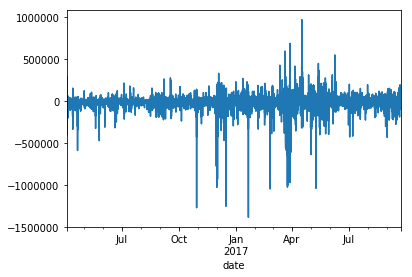

In [34]:
rs_full['direction_amt'].plot()